# Import Packages

In [16]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import load_digits, make_moons
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.datasets.samples_generator import make_blobs
from sklearn import cluster
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Clustering - Simulated Example

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

### Generate some data

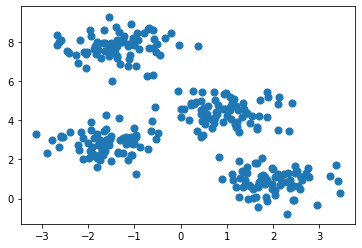

In [6]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

### Learn K

__Question.__ Choose K using the Elbow Method

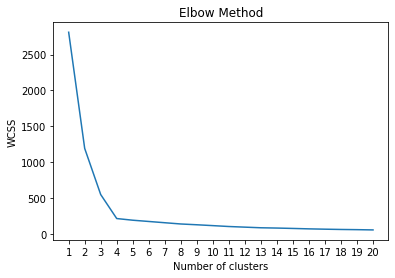

In [7]:
wcss = []
possible_n = range(1,21)
for i in possible_n:
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(possible_n, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(possible_n)
plt.show()

### Fit 4 Cluster K-Means

__Question.__ Fit and plot Kmeans with 4 clusters with a different colour for each label

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

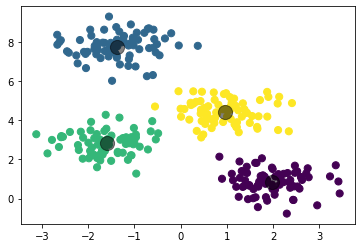

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Clustering - Digits Example

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

### Load Data

In [10]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

Fit PCA

In [11]:
reduced_data = TSNE(n_components=2).fit_transform(data)

Plot data

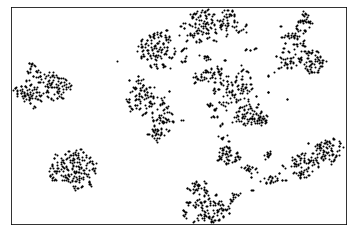

In [33]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Attempt to Choose K with Elbow Method

__Question.__ Try and choose K using the Elbow Method

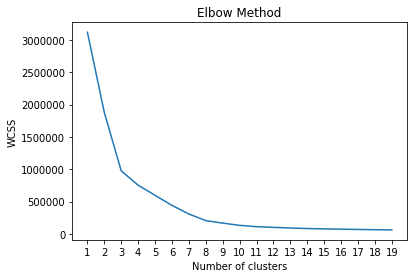

In [12]:
wcss = []
possible_n = range(1,20)
for i in possible_n:
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)
plt.plot(possible_n, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(possible_n)
plt.show()

Visualise PCA Results with 9 classes

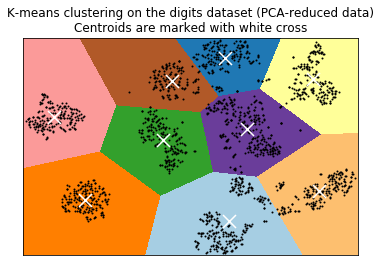

In [13]:
kmeans = KMeans(init='k-means++', n_clusters=9, n_init=10)
kmeans.fit(reduced_data)

# Plot the decision boundary. For that, we will assign a color to each
h = .02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Silhouette Score for K for K-Means

https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

__Question.__ Try and pick the optimal score using the Silhouette Score (*silhouette_score()*)

In [17]:
possible_n = range(2,21)
silos = []
for i in possible_n:
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmeans.fit(reduced_data)
    label = kmeans.labels_
    silos.append(silhouette_score(reduced_data, label, metric='euclidean'))

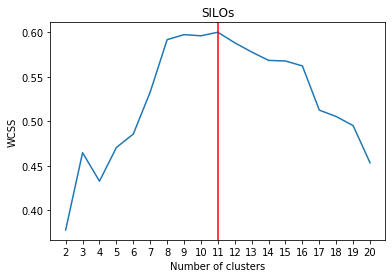

In [35]:
plt.plot(possible_n, silos)
plt.title('SILOs')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(possible_n)
plt.axvline(x=possible_n[np.array(silos).argmax()], c='r')
plt.show()

### BIC for K for K-Means

In [19]:
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    LIKE = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)])
    BIC = const_term - 2*LIKE

    return(BIC)

__Question.__ Try and pick the optimal K using BIC

In [20]:
ks = range(7,26)

KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(reduced_data) for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,reduced_data) for kmeansi in KMeans]

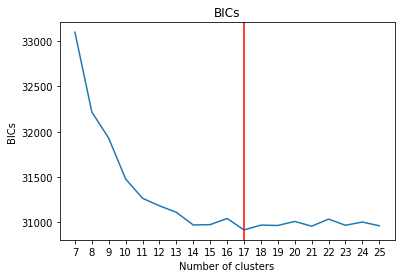

In [27]:
plt.plot(ks, BIC)
plt.title('BICs')
plt.xlabel('Number of clusters')
plt.ylabel('BICs')
plt.xticks(ks)
plt.axvline(x=ks[np.array(BIC).argmin()], c='r')
plt.show()

# Kernel Based Clustering

In [29]:
X, y = make_moons(200, noise=.05, random_state=0)

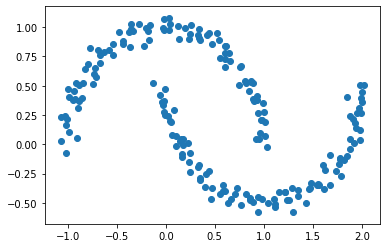

In [30]:
plt.scatter(X[:, 0], X[:, 1])

__Question.__ Try Clustering comparing K-means clustering with kernel based clustering using *SpectralClustering*

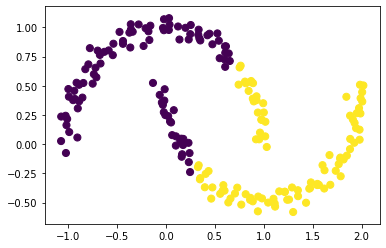

In [12]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

c:\users\vinny\.virtualenvs\ml4ds-iigba4jm\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


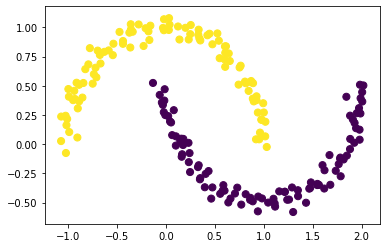

In [13]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');